# HW1. 탐색적 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('total_rent/real_total_rent.csv')

In [3]:
train = train.fillna(0)
train.head(5)

,STATION,YEAR,MONTH,DAY,HOUR,WEEKDAY,SEASON,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY,SNOWFALL,RENTCOUNT
0,1,2013,1,1,0,1,3,-8.8,0.0,0.1,90.0,8.8,0.0
1,1,2013,1,1,1,1,3,-8.5,0.0,0.9,90.0,8.8,0.0
2,1,2013,1,1,2,1,3,-8.5,0.0,1.0,89.0,8.8,0.0
3,1,2013,1,1,3,1,3,-9.0,0.0,0.7,91.0,8.8,0.0
4,1,2013,1,1,4,1,3,-9.1,0.0,0.6,92.0,8.8,0.0


# 1-a. 탐색분석

### 1-a-1. 계절별 대여량

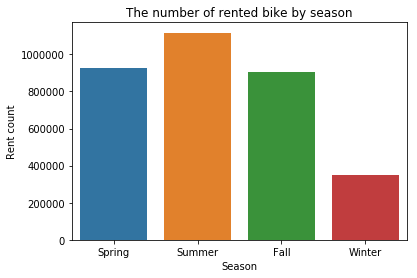

In [4]:
group_season = train.groupby(['SEASON'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_season['SEASON'], y = group_season['RENTCOUNT'])
ax.set(xlabel = 'Season', ylabel = 'Rent count')
season = ['Spring', 'Summer', 'Fall', 'Winter']
plt.xticks(np.arange(4), season)
plt.title('The number of rented bike by season')
plt.show()

### 1-a-2. 요일별 대여량

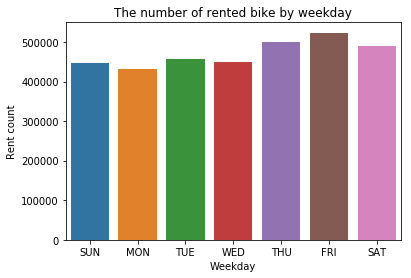

In [5]:
group_weekday = train.groupby(['WEEKDAY'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x = group_weekday['WEEKDAY'], y = group_weekday['RENTCOUNT'])
ax.set(xlabel = 'Weekday', ylabel = 'Rent count')
weekday = ['SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT']
plt.xticks(np.arange(7), weekday)
plt.title('The number of rented bike by weekday')
plt.show()

### 1-a-3. 월별 대여량

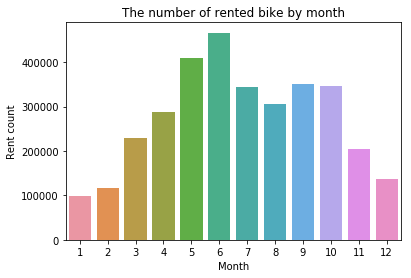

In [6]:
group_month = train.groupby(['MONTH'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x = group_month['MONTH'], y = group_month['RENTCOUNT'])
ax.set(xlabel = 'Month', ylabel = 'Rent count')
plt.title('The number of rented bike by month')
plt.show()

### 1-a-4. 시간별 대여량

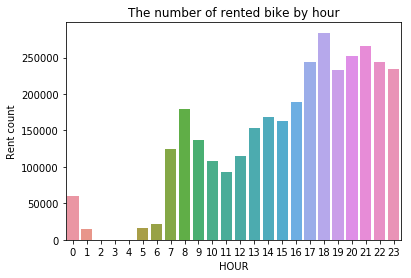

In [7]:
group_hr = train.groupby(['HOUR'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x = group_hr['HOUR'], y = group_hr['RENTCOUNT'])
ax.set(xlabel = 'HOUR', ylabel = 'Rent count')
plt.title('The number of rented bike by hour')
plt.show()

# 1-b. Top 10 인기 경로

In [8]:
topten = pd.read_csv('tashu_csv/tashu.csv')

In [9]:
# NaN 제거

topten = topten.dropna()
topten.head(10)

,RENT_STATION,RENT_DATE,RETURN_STATION,RETURN_DATE
0,43.0,20130101055603,34.0,2.013010e+13
2,2.0,20130101060406,10.0,2.013010e+13
3,106.0,20130101105305,105.0,2.013010e+13
4,4.0,20130101112223,4.0,2.013010e+13
5,21.0,20130101113953,105.0,2.013010e+13
6,90.0,20130101120833,91.0,2.013010e+13
7,13.0,20130101131429,30.0,2.013010e+13
8,1.0,20130101133742,1.0,2.013010e+13
9,1.0,20130101133813,2.0,2.013010e+13
10,1.0,20130101133847,2.0,2.013010e+13


## 인기경로 TOP - 10 뽑기

In [10]:
clean_topten_df = topten.groupby(['RENT_STATION', 'RETURN_STATION']).size().nlargest(10).reset_index()

In [11]:
clean_topten_df = clean_topten_df[clean_topten_df['RENT_STATION'] < 145]
clean_topten_df = clean_topten_df[clean_topten_df['RETURN_STATION'] < 145]

In [12]:
clean_topten_df['RENT_STATION'] = clean_topten_df['RENT_STATION'].astype('int')
clean_topten_df['RETURN_STATION'] = clean_topten_df['RETURN_STATION'].astype('int')
clean_topten_df

,RENT_STATION,RETURN_STATION,0
0,3,3,84496
1,31,31,21749
2,56,56,18343
3,21,105,17220
4,1,1,14489
5,32,32,12177
6,105,21,12154
7,33,33,11973
8,17,17,11966
9,56,32,11868


## station정보 가져오기

In [13]:
station_df = pd.read_csv('station/station.csv')
station_df.head(5)

,번호,키오스크번호,구별,명칭,위치,주소,거치대,좌표
0,1,1,유성구,무역전시관입구(택시승강장 앞),엑스포다리 맞은편,유성구 도룡동 3-8,14,"36.374325,127.387462"
1,2,2,유성구,대전컨벤션 센터 앞,둔산대교 맞은편,유성구 도룡동 4-19,20,"36.374472,127.392241"
2,3,3,서구,한밭수목원(정문입구),한밭수목원 내,서구 만년동 396,19,"36.369855,127.388749"
3,4,4,서구,초원아파트104동부근(버스정류장),초원아파트 104동앞 쪽문 육교 버스정류장 앞,서구 만년동 401,12,"36.368192,127.379281"
4,5,5,서구,둔산대공원 입구(버스정류장),한밭수목원에서 평송수련원 가는길 버스정류장 앞,서구 둔산동 1521-10,13,"36.365034,127.389361"


In [14]:
rent_dot_list = []
return_dot_list = []

In [15]:
for i in range(len(clean_topten_df)):
    rent_dot_list.append(station_df.loc[station_df.index[clean_topten_df['RENT_STATION'][i]-1], "좌표"])
    return_dot_list.append(station_df.loc[station_df.index[clean_topten_df['RETURN_STATION'][i]-1], "좌표"])

In [16]:
print(rent_dot_list)
print('----------------------')
print(return_dot_list)

['36.369855,127.388749', '36.361773, 127.357485', '36.361736, 127.344994', '36.373457,127.359293', '36.374325,127.387462', '36.359293, 127.354503', '36.364177,127.358845', '36.358494, 127.361197', '36.35219,127.378814', '36.361736, 127.344994']
----------------------
['36.369855,127.388749', '36.361773, 127.357485', '36.361736, 127.344994', '36.364177,127.358845', '36.374325,127.387462', '36.359293, 127.354503', '36.373457,127.359293', '36.358494, 127.361197', '36.35219,127.378814', '36.359293, 127.354503']


In [17]:
rent_dot_list_lat = []
rent_dot_list_lon = []
return_dot_list_lat = []
return_dot_list_lon = []

In [67]:
for j in range(len(clean_topten_df)):
    rent_tmp = rent_dot_list[j].split(',')
    rent_dot_list_lat.append(float(rent_tmp[0]))
    rent_dot_list_lon.append(float(rent_tmp[1]))
    return_tmp = return_dot_list[j].split(',')
    return_dot_list_lat.append(float(return_tmp[0]))
    return_dot_list_lon.append(float(return_tmp[1]))
print(rent_dot_list_lat)
print(rent_dot_list_lon)
print(return_dot_list_lat)
print(return_dot_list_lon)

[36.369855, 36.361773, 36.361736, 36.373457, 36.374325, 36.359293, 36.364177, 36.358494, 36.35219, 36.361736]
[127.388749, 127.357485, 127.344994, 127.359293, 127.387462, 127.354503, 127.358845, 127.361197, 127.378814, 127.344994]
[36.369855, 36.361773, 36.361736, 36.364177, 36.374325, 36.359293, 36.373457, 36.358494, 36.35219, 36.359293]
[127.388749, 127.357485, 127.344994, 127.358845, 127.387462, 127.354503, 127.359293, 127.361197, 127.378814, 127.354503]


In [68]:
top_lat = list(zip(rent_dot_list_lat, return_dot_list_lat))
top_lon = list(zip(rent_dot_list_lon, return_dot_list_lon))

In [69]:
top_lat

[(36.369855, 36.369855),
 (36.361773, 36.361773),
 (36.361736, 36.361736),
 (36.373457, 36.364177),
 (36.374325, 36.374325),
 (36.359293, 36.359293),
 (36.364177, 36.373457),
 (36.358494, 36.358494),
 (36.35219, 36.35219),
 (36.361736, 36.359293)]

In [70]:
import gmplot
import statistics

In [71]:
gmapl = gmplot.GoogleMapPlotter(statistics.median(rent_dot_list_lat),
                              statistics.median(rent_dot_list_lon), 14)
for i in range(0 , len(top_lat)):
    gmapl.plot(list(top_lat[i]) , list(top_lon[i]) , 'cornflowerblue' , edge_width=3.5)
    gmapl.scatter(list(top_lat[i]) , list(top_lon[i]), size=30, color = '#FF0000' ,marker=False)
gmapl.draw('top10.html')

## 1-b-(추가). 대여지점으로 돌아오는 경로를 제외한 Top 10

In [96]:
remove_overlap_topten_df = topten.groupby(['RENT_STATION', 'RETURN_STATION']).size().reset_index()

In [97]:
# 144보다 큰 station 데이터 삭제
remove_overlap_topten_df = remove_overlap_topten_df[remove_overlap_topten_df['RENT_STATION'] < 145]
remove_overlap_topten_df = remove_overlap_topten_df[remove_overlap_topten_df['RETURN_STATION'] < 145]

In [98]:
# data type을 int형으로 변환
remove_overlap_topten_df['RENT_STATION'] = remove_overlap_topten_df['RENT_STATION'].astype('int')
remove_overlap_topten_df['RETURN_STATION'] = remove_overlap_topten_df['RETURN_STATION'].astype('int')
remove_overlap_topten_df

,RENT_STATION,RETURN_STATION,0
0,1,1,14489
1,1,2,660
2,1,3,6135
3,1,4,851
4,1,5,802
5,1,6,289
6,1,7,666
7,1,8,549
8,1,9,281
9,1,10,681


## rent station과 return station이 같은 데이터는 제거해준 결과

In [99]:
remove_overlap_topten_df = remove_overlap_topten_df[remove_overlap_topten_df['RENT_STATION']
                                                    != remove_overlap_topten_df['RETURN_STATION']]
remove_overlap_topten_df.head(10)

,RENT_STATION,RETURN_STATION,0
1,1,2,660
2,1,3,6135
3,1,4,851
4,1,5,802
5,1,6,289
6,1,7,666
7,1,8,549
8,1,9,281
9,1,10,681
10,1,11,203


In [100]:
# 내림차순으로 정렬한다.
remove_overlap_topten_df = remove_overlap_topten_df.sort_values(by=0, ascending=False)

In [101]:
# 상위 10개만 뽑아서 저장
remove_overlap_topten_df = remove_overlap_topten_df[:10]

In [102]:
remove_overlap_topten_df

,RENT_STATION,RETURN_STATION,0
3361,21,105,17220
15442,105,21,12154
8684,56,32,11868
5069,32,56,11118
15443,105,22,8074
15819,107,105,7912
3514,22,105,7463
3291,21,22,6556
2,1,3,6135
15520,105,107,6065


In [103]:
remove_overlap_topten_df = remove_overlap_topten_df.reset_index()
del remove_overlap_topten_df['index']
remove_overlap_topten_df

,RENT_STATION,RETURN_STATION,0
0,21,105,17220
1,105,21,12154
2,56,32,11868
3,32,56,11118
4,105,22,8074
5,107,105,7912
6,22,105,7463
7,21,22,6556
8,1,3,6135
9,105,107,6065


In [104]:
remove_overlap_rent_dot_list = []
remove_overlap_return_dot_list = []

In [105]:
for k in range(len(remove_overlap_topten_df)):
    remove_overlap_rent_dot_list.append(station_df.loc[station_df.index[remove_overlap_topten_df['RENT_STATION'].iloc[k]-1], "좌표"])
    remove_overlap_return_dot_list.append(station_df.loc[station_df.index[remove_overlap_topten_df['RETURN_STATION'].iloc[k]-1], "좌표"])

In [106]:
ro_rent_dot_list_lat = []
ro_rent_dot_list_lon = []
ro_return_dot_list_lat = []
ro_return_dot_list_lon = []

In [107]:
for m in range(len(clean_topten_df)):
    ro_rent_tmp = remove_overlap_rent_dot_list[m].split(',')
    ro_rent_dot_list_lat.append(float(ro_rent_tmp[0]))
    ro_rent_dot_list_lon.append(float(ro_rent_tmp[1]))
    ro_return_tmp = remove_overlap_return_dot_list[m].split(',')
    ro_return_dot_list_lat.append(float(ro_return_tmp[0]))
    ro_return_dot_list_lon.append(float(ro_return_tmp[1]))
print(ro_rent_dot_list_lat)
print(ro_rent_dot_list_lon)
print(ro_return_dot_list_lat)
print(ro_return_dot_list_lon)

[36.373457, 36.364177, 36.361736, 36.359293, 36.364177, 36.370768, 36.370263, 36.373457, 36.374325, 36.364177]
[127.359293, 127.358845, 127.344994, 127.354503, 127.358845, 127.366645, 127.362136, 127.359293, 127.387462, 127.358845]
[36.364177, 36.373457, 36.359293, 36.361736, 36.370263, 36.364177, 36.364177, 36.370263, 36.369855, 36.370768]
[127.358845, 127.359293, 127.354503, 127.344994, 127.362136, 127.358845, 127.358845, 127.362136, 127.388749, 127.366645]


In [108]:
ro_top_lat = list(zip(ro_rent_dot_list_lat, ro_return_dot_list_lat))
ro_top_lon = list(zip(ro_rent_dot_list_lon, ro_return_dot_list_lon))

In [109]:
ro_top_lat

[(36.373457, 36.364177),
 (36.364177, 36.373457),
 (36.361736, 36.359293),
 (36.359293, 36.361736),
 (36.364177, 36.370263),
 (36.370768, 36.364177),
 (36.370263, 36.364177),
 (36.373457, 36.370263),
 (36.374325, 36.369855),
 (36.364177, 36.370768)]

In [110]:
gmapl = gmplot.GoogleMapPlotter(statistics.median(ro_rent_dot_list_lat),
                              statistics.median(ro_rent_dot_list_lon), 14)
for i in range(0 , len(ro_top_lat)):
    gmapl.plot(list(ro_top_lat[i]) , list(ro_top_lon[i]) , 'cornflowerblue' , edge_width=3.5)
    gmapl.scatter(list(ro_top_lat[i]) , list(ro_top_lon[i]), size=30, color = '#FF0000' ,marker=False)
gmapl.draw('remove_overlap_top10.html')

## 1-c. 이용 경로 (Chord diagram)

In [26]:
chord_df = topten.groupby(['RENT_STATION', 'RETURN_STATION']).size().reset_index()

In [27]:
chord_df = chord_df[chord_df['RENT_STATION'] < 145]
chord_df = chord_df[chord_df['RETURN_STATION'] < 145]
chord_df = chord_df.reset_index()

In [30]:
del chord_df['index']

In [46]:
print(chord_df.head(5))
print('--------------------------------------------')
print(len(chord_df))

   RENT_STATION  RETURN_STATION      0
0             1               1  14489
1             1               2    660
2             1               3   6135
3             1               4    851
4             1               5    802
--------------------------------------------
18295


In [32]:
chord_df['RENT_STATION'] = chord_df['RENT_STATION'].astype('int')
chord_df['RETURN_STATION'] = chord_df['RETURN_STATION'].astype('int')
chord_df

,RENT_STATION,RETURN_STATION,0
0,1,1,14489
1,1,2,660
2,1,3,6135
3,1,4,851
4,1,5,802
5,1,6,289
6,1,7,666
7,1,8,549
8,1,9,281
9,1,10,681


In [33]:
temp_chord_data = np.zeros((144,144))
temp_chord_data 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
for n in range(18295):
    x_index = chord_df.iloc[n]['RENT_STATION']
    y_index = chord_df.iloc[n]['RETURN_STATION']
    temp_chord_data[x_index-1][y_index-1] = chord_df.iloc[n][0]

In [36]:
temp_chord_data

array([[1.4489e+04, 6.6000e+02, 6.1350e+03, ..., 3.2000e+01, 1.1900e+02,
        2.4900e+02],
       [1.0790e+03, 6.6700e+03, 9.0100e+02, ..., 1.8000e+01, 5.4000e+01,
        1.8500e+02],
       [5.7740e+03, 1.4340e+03, 8.4496e+04, ..., 1.4600e+02, 3.3400e+02,
        4.5400e+02],
       ...,
       [6.4000e+01, 1.9000e+01, 1.5900e+02, ..., 2.9490e+03, 2.9400e+02,
        1.1500e+02],
       [1.4400e+02, 6.0000e+01, 5.6700e+02, ..., 3.7100e+02, 4.9950e+03,
        1.8000e+01],
       [1.7400e+02, 2.2100e+02, 3.9000e+02, ..., 3.1000e+01, 1.9000e+01,
        3.8430e+03]])

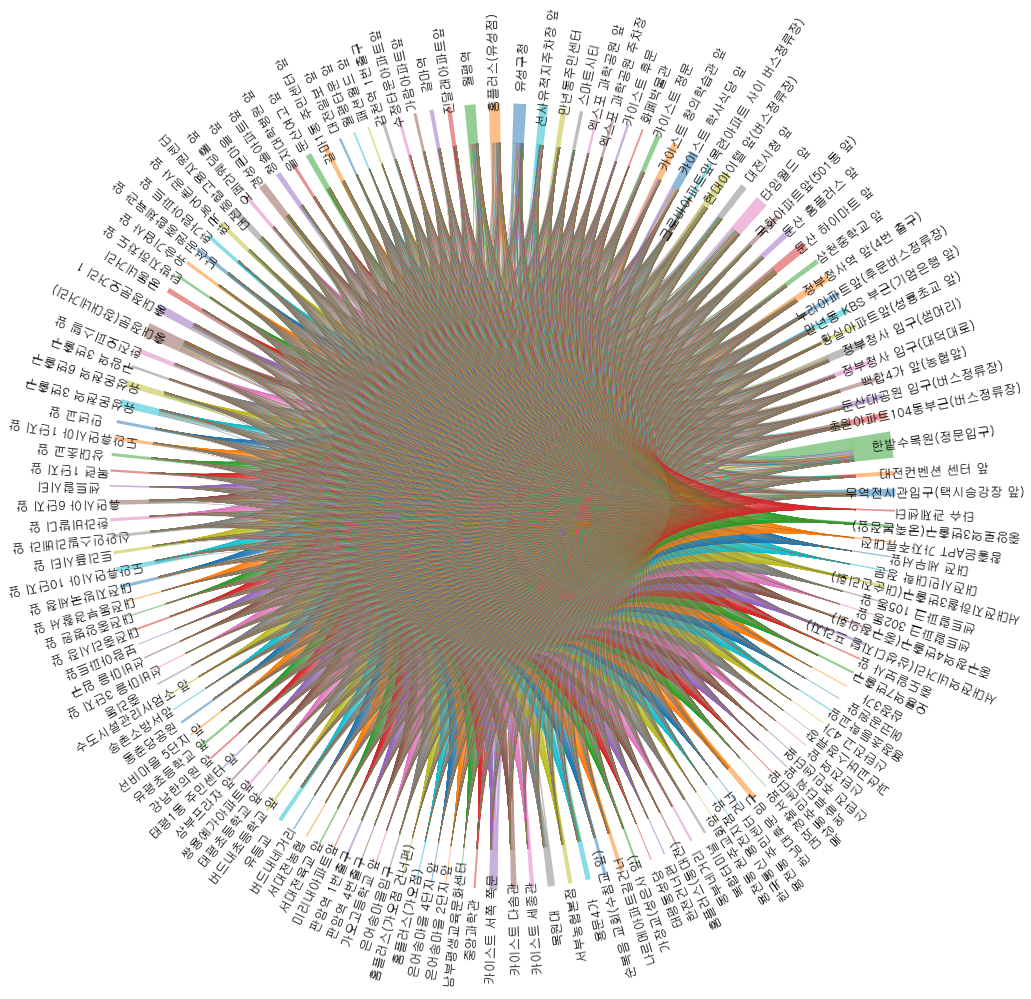

In [49]:
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np

LW = 0.3

font_path = 'NGULIM.TTF'
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_name)

def polar2xy(r, theta):
    return np.array([r*np.cos(theta), r*np.sin(theta)])

def hex2rgb(c):
    return tuple(int(c[i:i+2], 16)/256.0 for i in (1, 3 ,5))

def IdeogramArc(start=0, end=60, radius=1.0, width=0.2, ax=None, color=(1,0,0)):
    # start, end should be in [0, 360)
    if start > end:
        start, end = end, start
    start *= np.pi/180.
    end *= np.pi/180.
    # optimal distance to the control points
    # https://stackoverflow.com/questions/1734745/how-to-create-circle-with-b%C3%A9zier-curves
    opt = 4./3. * np.tan((end-start)/ 4.) * radius
    inner = radius*(1-width)
    verts = [
        polar2xy(radius, start),
        polar2xy(radius, start) + polar2xy(opt, start+0.5*np.pi),
        polar2xy(radius, end) + polar2xy(opt, end-0.5*np.pi),
        polar2xy(radius, end),
        polar2xy(inner, end),
        polar2xy(inner, end) + polar2xy(opt*(1-width), end-0.5*np.pi),
        polar2xy(inner, start) + polar2xy(opt*(1-width), start+0.5*np.pi),
        polar2xy(inner, start),
        polar2xy(radius, start),
        ]

    codes = [Path.MOVETO,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.LINETO,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CLOSEPOLY,
             ]

    if ax == None:
        return verts, codes
    else:
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor=color+(0.5,), edgecolor=color+(0.4,), lw=LW)
        ax.add_patch(patch)


def ChordArc(start1=0, end1=60, start2=180, end2=240, radius=1.0, chordwidth=0.7, ax=None, color=(1,0,0)):
    # start, end should be in [0, 360)
    if start1 > end1:
        start1, end1 = end1, start1
    if start2 > end2:
        start2, end2 = end2, start2
    start1 *= np.pi/180.
    end1 *= np.pi/180.
    start2 *= np.pi/180.
    end2 *= np.pi/180.
    opt1 = 4./3. * np.tan((end1-start1)/ 4.) * radius
    opt2 = 4./3. * np.tan((end2-start2)/ 4.) * radius
    rchord = radius * (1-chordwidth)
    verts = [
        polar2xy(radius, start1),
        polar2xy(radius, start1) + polar2xy(opt1, start1+0.5*np.pi),
        polar2xy(radius, end1) + polar2xy(opt1, end1-0.5*np.pi),
        polar2xy(radius, end1),
        polar2xy(rchord, end1),
        polar2xy(rchord, start2),
        polar2xy(radius, start2),
        polar2xy(radius, start2) + polar2xy(opt2, start2+0.5*np.pi),
        polar2xy(radius, end2) + polar2xy(opt2, end2-0.5*np.pi),
        polar2xy(radius, end2),
        polar2xy(rchord, end2),
        polar2xy(rchord, start1),
        polar2xy(radius, start1),
        ]

    codes = [Path.MOVETO,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             ]

    if ax == None:
        return verts, codes
    else:
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor=color+(0.5,), edgecolor=color+(0.4,), lw=LW)
        ax.add_patch(patch)

def selfChordArc(start=0, end=60, radius=1.0, chordwidth=0.7, ax=None, color=(1,0,0)):
    # start, end should be in [0, 360)
    if start > end:
        start, end = end, start
    start *= np.pi/180.
    end *= np.pi/180.
    opt = 4./3. * np.tan((end-start)/ 4.) * radius
    rchord = radius * (1-chordwidth)
    verts = [
        polar2xy(radius, start),
        polar2xy(radius, start) + polar2xy(opt, start+0.5*np.pi),
        polar2xy(radius, end) + polar2xy(opt, end-0.5*np.pi),
        polar2xy(radius, end),
        polar2xy(rchord, end),
        polar2xy(rchord, start),
        polar2xy(radius, start),
        ]

    codes = [Path.MOVETO,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             ]

    if ax == None:
        return verts, codes
    else:
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor=color+(0.5,), edgecolor=color+(0.4,), lw=LW)
        ax.add_patch(patch)

def chordDiagram(X, ax, colors=None, width=0.1, pad=2, chordwidth=0.7):
    """Plot a chord diagram
    Parameters
    ----------
    X :
        flux data, X[i, j] is the flux from i to j
    ax :
        matplotlib `axes` to show the plot
    colors : optional
        user defined colors in rgb format. Use function hex2rgb() to convert hex color to rgb color. Default: d3.js category10
    width : optional
        width/thickness of the ideogram arc
    pad : optional
        gap pad between two neighboring ideogram arcs, unit: degree, default: 2 degree
    chordwidth : optional
        position of the control points for the chords, controlling the shape of the chords
    """
    # X[i, j]:  i -> j
    x = X.sum(axis = 1) # sum over rows
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)

    if colors is None:
    # use d3.js category10 https://github.com/d3/d3-3.x-api-reference/blob/master/Ordinal-Scales.md#category10
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                 '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                 '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                 '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                 '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                 '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                 '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                 '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                 '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                 '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                 '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                 '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                 '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                 '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                 '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
 
        colors = [hex2rgb(colors[i]) for i in range(len(x))]

    # find position for each start and end
    y = x/np.sum(x).astype(float) * (360 - pad*len(x))

    pos = {}
    arc = []
    nodePos = []
    start = 0
    for i in range(len(x)):
        end = start + y[i]
        arc.append((start, end))
        angle = 0.5*(start+end)
        #print(start, end, angle)
        if -30 <= angle <= 210:
            angle -= 90
        else:
            angle -= 270
        nodePos.append(tuple(polar2xy(1.1, 0.5*(start+end)*np.pi/180.)) + (angle,))
        z = (X[i, :]/x[i].astype(float)) * (end - start)
        ids = np.argsort(z)
        z0 = start
        for j in ids:
            pos[(i, j)] = (z0, z0+z[j])
            z0 += z[j]
        start = end + pad

    for i in range(len(x)):
        start, end = arc[i]
        IdeogramArc(start=start, end=end, radius=1.0, ax=ax, color=colors[i], width=width)
        start, end = pos[(i,i)]
        selfChordArc(start, end, radius=1.-width, color=colors[i], chordwidth=chordwidth*0.7, ax=ax)
        for j in range(i):
            color = colors[i]
            if X[i, j] > X[j, i]:
                color = colors[j]
            start1, end1 = pos[(i,j)]
            start2, end2 = pos[(j,i)]
            ChordArc(start1, end1, start2, end2,
                     radius=1.-width, color=colors[i], chordwidth=chordwidth, ax=ax)

    #print(nodePos)
    return nodePos

##################################
if __name__ == "__main__":
    fig = plt.figure(figsize=(12,12))
    flux = np.array(temp_chord_data)

    ax = plt.axes([0,0,1,1])

    #nodePos = chordDiagram(flux, ax, colors=[hex2rgb(x) for x in ['#666666', '#66ff66', '#ff6666', '#6666ff']])
    nodePos = chordDiagram(flux, ax)
    ax.axis('off')
    prop = dict(fontsize=16*0.8, ha='center', va='center')
    nodes = station_df['명칭']
    for i in range(144):
        ax.text(nodePos[i][0], nodePos[i][1], nodes[i], rotation=nodePos[i][2]+90, **prop)

    plt.savefig("chord.png", dpi=600,
            transparent=True,
            bbox_inches='tight', pad_inches=0.02)